<a href="https://colab.research.google.com/github/inefable12/Exploracion_insilico_2024/blob/main/ann_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de logP

## Los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/inefable12/LogP_ANN/main/sider_original_con_clases_sin_NC6.csv")
df

,CLASS,nombre,nAtom,nHeavyAtom,nH,nB,nC,nN,nO,nS,...,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_r8,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc,MolLogP
0,h,006_Ch.mol2,105,51,54,0,33,6,12,0,...,0,0,1,0,0,0,0,0,0,-0.1721
1,h,006.mol2,113,55,58,0,36,6,13,0,...,0,0,1,0,0,0,0,0,0,0.3475
2,h,007.mol2,108,52,56,0,34,6,12,0,...,0,0,1,0,0,0,0,0,0,0.0886
3,x,010.mol2,70,41,29,0,22,3,16,0,...,0,2,0,0,0,0,0,0,0,-4.1238
4,mix,012.mol2,89,41,48,0,28,4,9,0,...,0,0,0,0,0,0,0,0,0,2.3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,h,276.mol2,110,54,56,0,35,6,13,0,...,0,0,1,0,0,0,0,0,0,0.0053
228,otro,279.mol2,86,50,36,0,30,7,10,2,...,1,2,2,0,0,0,0,2,1,1.1530
229,otro,280.mol2,89,51,38,0,31,7,10,2,...,1,2,2,0,0,0,0,2,1,1.4560
230,otro,281.mol2,85,50,35,0,30,7,10,2,...,1,2,2,0,0,0,0,2,1,1.1530


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Columns: 252 entries, CLASS to MolLogP
dtypes: float64(88), int64(162), object(2)
memory usage: 456.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
nAtom,232.0,100.715517,30.493291,39.0000,79.00000,100.00000,123.0,180.0000
nHeavyAtom,232.0,51.103448,14.668858,22.0000,41.75000,51.00000,61.0,85.0000
nH,232.0,49.612069,16.827246,15.0000,37.00000,48.00000,61.0,97.0000
nB,232.0,0.000000,0.000000,0.0000,0.00000,0.00000,0.0,0.0000
nC,232.0,32.163793,9.240832,12.0000,26.00000,32.00000,39.0,61.0000
...,...,...,...,...,...,...,...,...
MQNs_topology_counts_rg,232.0,0.025862,0.159067,0.0000,0.00000,0.00000,0.0,1.0000
MQNs_topology_counts_rgIO,232.0,0.237069,0.426204,0.0000,0.00000,0.00000,0.0,1.0000
MQNs_topology_counts_afrc,232.0,0.133621,0.780880,0.0000,0.00000,0.00000,0.0,10.0000
MQNs_topology_counts_bfrc,232.0,0.090517,0.747577,0.0000,0.00000,0.00000,0.0,11.0000


In [12]:
len(df.columns.unique()) #df.columns.unique()

252

<Axes: >

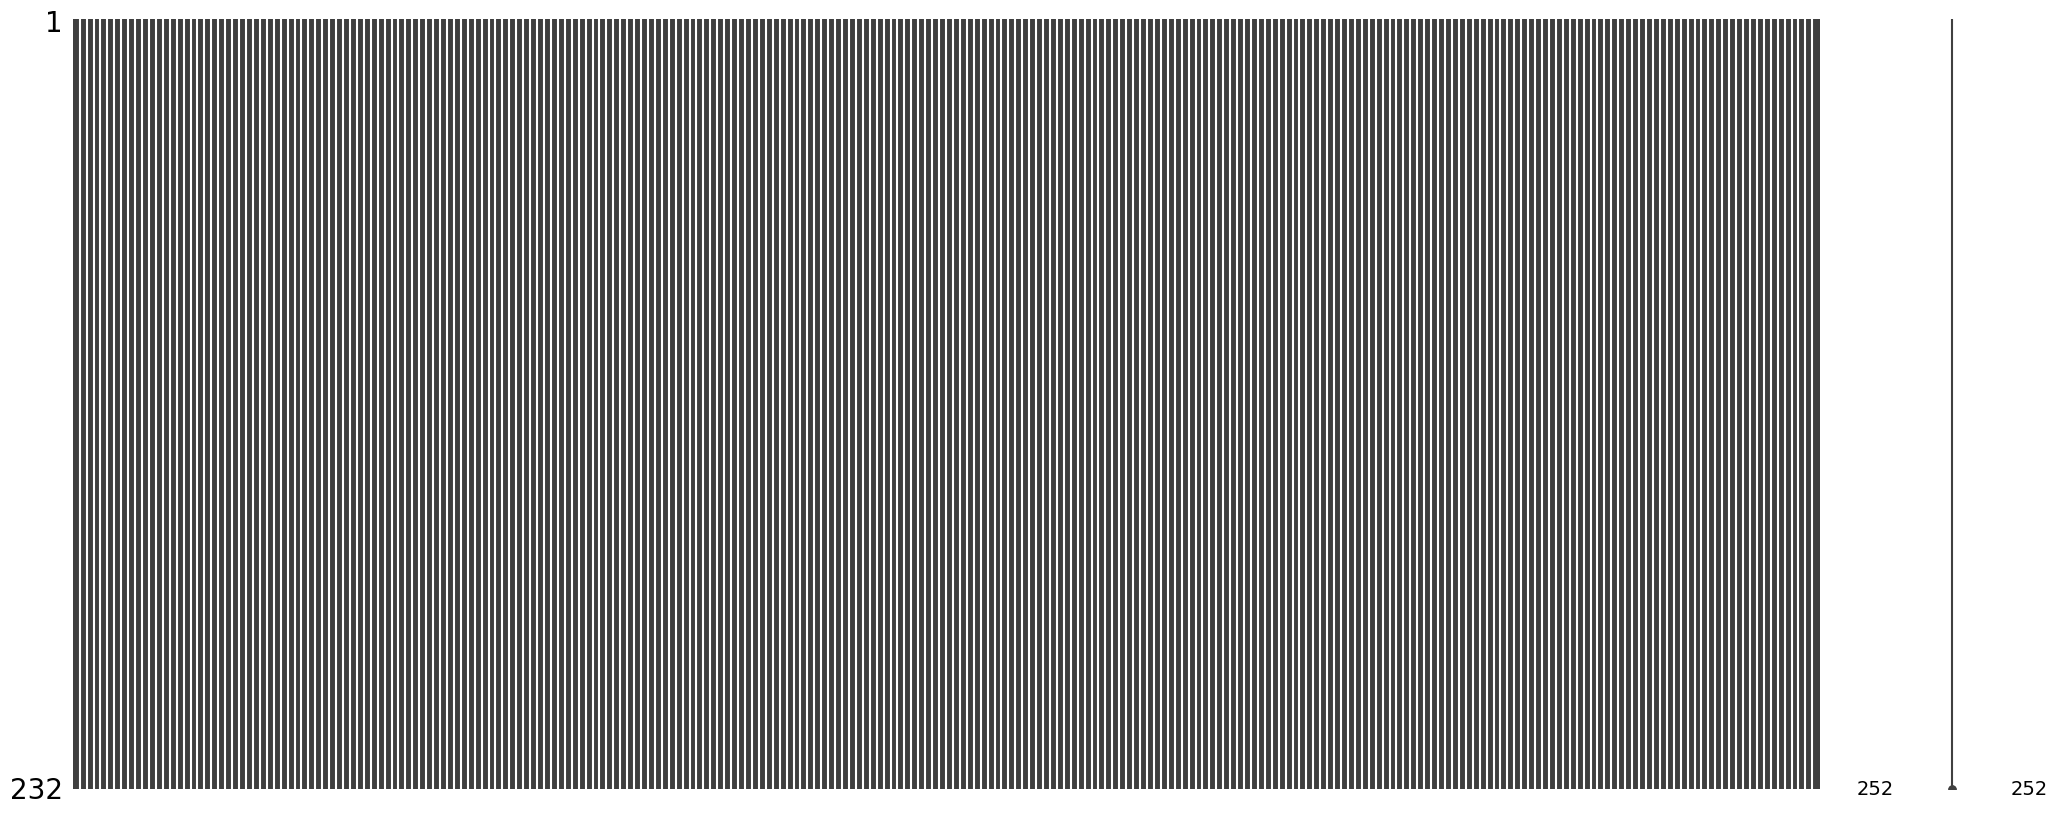

In [11]:
import missingno as msn

msn.matrix(df)

In [17]:
df = df.dropna()

In [18]:
df.shape

(232, 252)

In [19]:
df.to_csv("borrame.csv")

In [22]:
df["nAtom"].min()

39

In [23]:
df["nAtom"].max()

180

In [24]:
df["nB"].min()

0

In [25]:
df["nB"].max()

0

In [27]:
if df["nB"].max() == df["nB"].min():
  df.drop(columns=['nB'], inplace=True)

In [28]:
df

,CLASS,nombre,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nP,...,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_r8,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc,MolLogP
0,h,006_Ch.mol2,105,51,54,33,6,12,0,0,...,0,0,1,0,0,0,0,0,0,-0.1721
1,h,006.mol2,113,55,58,36,6,13,0,0,...,0,0,1,0,0,0,0,0,0,0.3475
2,h,007.mol2,108,52,56,34,6,12,0,0,...,0,0,1,0,0,0,0,0,0,0.0886
3,x,010.mol2,70,41,29,22,3,16,0,0,...,0,2,0,0,0,0,0,0,0,-4.1238
4,mix,012.mol2,89,41,48,28,4,9,0,0,...,0,0,0,0,0,0,0,0,0,2.3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,h,276.mol2,110,54,56,35,6,13,0,0,...,0,0,1,0,0,0,0,0,0,0.0053
228,otro,279.mol2,86,50,36,30,7,10,2,0,...,1,2,2,0,0,0,0,2,1,1.1530
229,otro,280.mol2,89,51,38,31,7,10,2,0,...,1,2,2,0,0,0,0,2,1,1.4560
230,otro,281.mol2,85,50,35,30,7,10,2,0,...,1,2,2,0,0,0,0,2,1,1.1530


In [30]:
df.drop(columns=['CLASS','nombre'], inplace=True)

In [31]:
df

,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nP,nF,nCl,...,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_r8,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc,MolLogP
0,105,51,54,33,6,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.1721
1,113,55,58,36,6,13,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.3475
2,108,52,56,34,6,12,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0886
3,70,41,29,22,3,16,0,0,0,0,...,0,2,0,0,0,0,0,0,0,-4.1238
4,89,41,48,28,4,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,110,54,56,35,6,13,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0053
228,86,50,36,30,7,10,2,0,0,1,...,1,2,2,0,0,0,0,2,1,1.1530
229,89,51,38,31,7,10,2,0,0,1,...,1,2,2,0,0,0,0,2,1,1.4560
230,85,50,35,30,7,10,2,0,0,1,...,1,2,2,0,0,0,0,2,1,1.1530


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Columns: 249 entries, nAtom to MolLogP
dtypes: float64(88), int64(161)
memory usage: 451.4 KB


In [33]:
# Cómo hacer el llamado a todas las columnas
for i in df:
  print(i)

nAtom
nHeavyAtom
nH
nC
nN
nO
nS
nP
nF
nCl
nBr
nI
nX
nBonds
nBonds2
nBondsS
nBondsS2
nBondsS3
nBondsD
nBondsD2
nBondsT
nBondsQ
nBondsM
nRing
n3Ring
n4Ring
n5Ring
n6Ring
n7Ring
n8Ring
n9Ring
n10Ring
n11Ring
n12Ring
nG12Ring
nFRing
nF4Ring
nF5Ring
nF6Ring
nF7Ring
nF8Ring
nF9Ring
nF10Ring
nF11Ring
nF12Ring
nFG12Ring
nTRing
nT4Ring
nT5Ring
nT6Ring
nT7Ring
nT8Ring
nT9Ring
nT10Ring
nT11Ring
nT12Ring
nTG12Ring
nHeteroRing
n3HeteroRing
n4HeteroRing
n5HeteroRing
n6HeteroRing
n7HeteroRing
n8HeteroRing
n9HeteroRing
n10HeteroRing
n11HeteroRing
n12HeteroRing
nG12HeteroRing
nFHeteroRing
nF4HeteroRing
nF5HeteroRing
nF6HeteroRing
nF7HeteroRing
nF8HeteroRing
nF9HeteroRing
nF10HeteroRing
nF11HeteroRing
nF12HeteroRing
nFG12HeteroRing
nTHeteroRing
nT4HeteroRing
nT5HeteroRing
nT6HeteroRing
nT7HeteroRing
nT8HeteroRing
nT9HeteroRing
nT10HeteroRing
nT11HeteroRing
nT12HeteroRing
nTG12HeteroRing
PBF
PMI1
PMI2
PMI3
NPR1
NPR2
RadiusOfGyration
InertialShapeFactor
Eccentricity
Asphericity
SpherocityIndex
BalabanJ
Be

In [34]:
# Evaluar la entropía
for i in df:
  if df[i].max() == df[i].min():
    df.drop(columns=[i], inplace=True)

In [35]:
df

,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nCl,nX,nBonds,...,MQNs_topology_counts_r3,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc,MolLogP
0,105,51,54,33,6,12,0,0,0,51,...,0,0,0,1,0,0,0,0,0,-0.1721
1,113,55,58,36,6,13,0,0,0,55,...,0,0,0,1,0,0,0,0,0,0.3475
2,108,52,56,34,6,12,0,0,0,52,...,0,0,0,1,0,0,0,0,0,0.0886
3,70,41,29,22,3,16,0,0,0,42,...,0,0,2,0,0,0,0,0,0,-4.1238
4,89,41,48,28,4,9,0,0,0,40,...,0,0,0,0,0,0,0,0,0,2.3035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,110,54,56,35,6,13,0,0,0,54,...,0,0,0,1,0,0,0,0,0,0.0053
228,86,50,36,30,7,10,2,1,1,54,...,0,1,2,2,0,0,0,2,1,1.1530
229,89,51,38,31,7,10,2,1,1,55,...,0,1,2,2,0,0,0,2,1,1.4560
230,85,50,35,30,7,10,2,1,1,54,...,0,1,2,2,0,0,0,2,1,1.1530


Hasta aquí quedaron 232 rows × 214 columns

In [37]:
df["MQNs_topology_counts_r3"].sum()

1

## Division de la data

In [66]:
# Escalar
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [67]:
# Datos que se usarán:

X = df.drop(columns=['MolLogP'])
Y = df["MolLogP"]

In [68]:
X

,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nCl,nX,nBonds,...,MQNs_topology_counts_cqv,MQNs_topology_counts_r3,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc
0,0.468085,0.460317,0.475610,0.428571,0.3750,0.391304,0.000000,0.0,0.0,0.432836,...,0.071429,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000
1,0.524823,0.523810,0.524390,0.489796,0.3750,0.434783,0.000000,0.0,0.0,0.492537,...,0.071429,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000
2,0.489362,0.476190,0.500000,0.448980,0.3750,0.391304,0.000000,0.0,0.0,0.447761,...,0.071429,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000
3,0.219858,0.301587,0.170732,0.204082,0.1875,0.565217,0.000000,0.0,0.0,0.298507,...,0.214286,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.354610,0.301587,0.402439,0.326531,0.2500,0.260870,0.000000,0.0,0.0,0.268657,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.503546,0.507937,0.500000,0.469388,0.3750,0.434783,0.000000,0.0,0.0,0.477612,...,0.071429,0.0,0.0,0.000000,0.2,0.0,0.0,0.0,0.0,0.000000
228,0.333333,0.444444,0.256098,0.367347,0.4375,0.304348,0.666667,1.0,1.0,0.477612,...,0.285714,0.0,1.0,0.666667,0.4,0.0,0.0,0.0,0.2,0.090909
229,0.354610,0.460317,0.280488,0.387755,0.4375,0.304348,0.666667,1.0,1.0,0.492537,...,0.285714,0.0,1.0,0.666667,0.4,0.0,0.0,0.0,0.2,0.090909
230,0.326241,0.444444,0.243902,0.367347,0.4375,0.304348,0.666667,1.0,1.0,0.477612,...,0.285714,0.0,1.0,0.666667,0.4,0.0,0.0,0.0,0.2,0.090909


In [69]:
Y

0      0.526752
1      0.557698
2      0.542279
3      0.291406
4      0.674189
         ...   
227    0.537318
228    0.605670
229    0.623715
230    0.605670
231    0.605670
Name: MolLogP, Length: 232, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=182)

In [71]:
X_train

,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nCl,nX,nBonds,...,MQNs_topology_counts_cqv,MQNs_topology_counts_r3,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc
48,0.709220,0.761905,0.658537,0.632653,0.5625,0.652174,0.000000,0.0,0.0,0.716418,...,0.214286,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
20,0.460993,0.555556,0.390244,0.551020,0.4375,0.347826,0.000000,0.0,0.0,0.567164,...,0.000000,0.0,0.0,0.333333,0.6,0.0,0.0,0.0,0.2,0.090909
181,0.432624,0.412698,0.451220,0.367347,0.5000,0.304348,0.000000,0.0,0.0,0.388060,...,0.214286,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
161,0.574468,0.603175,0.548780,0.551020,0.3750,0.521739,0.000000,0.0,0.0,0.567164,...,0.642857,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
109,0.673759,0.714286,0.634146,0.591837,0.5625,0.608696,0.000000,0.0,0.0,0.671642,...,0.214286,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.134752,0.142857,0.146341,0.142857,0.3125,0.173913,0.000000,0.0,0.0,0.149254,...,0.142857,0.0,0.0,0.000000,0.4,0.0,0.0,0.0,0.0,0.000000
200,0.007092,0.000000,0.036585,0.061224,0.1250,0.000000,0.666667,0.0,0.0,0.029851,...,0.178571,0.0,0.0,0.666667,0.2,0.0,0.0,0.0,0.0,0.000000
217,0.787234,0.761905,0.792683,0.693878,0.5000,0.565217,0.000000,0.0,0.0,0.716418,...,0.214286,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000
190,0.127660,0.158730,0.121951,0.183673,0.1875,0.217391,0.000000,0.0,0.0,0.164179,...,0.000000,0.0,0.0,0.000000,0.4,0.0,0.0,0.0,0.0,0.000000


In [72]:
X_test

,nAtom,nHeavyAtom,nH,nC,nN,nO,nS,nCl,nX,nBonds,...,MQNs_topology_counts_cqv,MQNs_topology_counts_r3,MQNs_topology_counts_r4,MQNs_topology_counts_r5,MQNs_topology_counts_r6,MQNs_topology_counts_r7,MQNs_topology_counts_rg,MQNs_topology_counts_rgIO,MQNs_topology_counts_afrc,MQNs_topology_counts_bfrc
36,0.000000,0.031746,0.000000,0.061224,0.2500,0.043478,0.333333,0.0,0.0,0.059701,...,0.071429,0.0,0.0,0.666667,0.2,0.000000,0.0,0.0,0.0,0.000000
192,0.127660,0.174603,0.109756,0.102041,0.1250,0.478261,0.000000,0.0,0.0,0.149254,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
203,0.765957,0.952381,0.609756,0.734694,0.9375,0.695652,0.000000,0.0,0.0,0.925373,...,0.000000,0.0,0.0,0.000000,0.6,0.000000,0.0,0.0,0.0,0.000000
225,0.539007,0.539683,0.536585,0.551020,0.4375,0.304348,0.000000,0.0,0.0,0.522388,...,0.000000,0.0,0.0,0.000000,0.4,0.000000,0.0,0.0,0.2,0.090909
134,0.283688,0.317460,0.268293,0.285714,0.4375,0.260870,0.000000,0.0,0.0,0.328358,...,0.214286,0.0,0.0,0.333333,0.4,0.000000,0.0,0.0,0.0,0.000000
40,0.829787,0.857143,0.792683,0.693878,0.6250,0.739130,0.000000,0.0,0.0,0.791045,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
167,0.297872,0.365079,0.256098,0.408163,0.2500,0.260870,0.000000,0.0,0.0,0.388060,...,0.071429,0.0,0.0,0.333333,0.6,0.000000,0.0,0.0,0.0,0.000000
178,0.099291,0.063492,0.146341,0.061224,0.1875,0.217391,0.000000,0.0,0.0,0.044776,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
28,0.737589,0.666667,0.780488,0.653061,0.4375,0.434783,0.000000,0.0,0.0,0.611940,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
186,0.127660,0.111111,0.158537,0.081633,0.2500,0.260870,0.000000,0.0,0.0,0.089552,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [73]:
y_train

48     0.303287
20     0.610321
181    0.385552
161    0.605306
109    0.269293
         ...   
122    0.450509
200    0.662200
217    0.506950
190    0.532506
61     0.570889
Name: MolLogP, Length: 185, dtype: float64

In [74]:
len(y_test)

47

In [75]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=213, kernel_initializer='normal', activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics = 'accuracy')

In [77]:
# Entrenar el modelo
historial = model.fit(X_train, y_train, epochs=1000, batch_size=10, verbose=1)

Epoch 1/1000
19/19 [==============================] - 1s 1ms/step - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 2/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.0000e+00
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.0054
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0153 - accuracy: 0.0054
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.0054
Epoch 6/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.0054
Epoch 7/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 0.0054
Epoch 8/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.0054
Epoch 9/1000
19/19 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 0.0054
Epoch 10/1000
19/19 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy

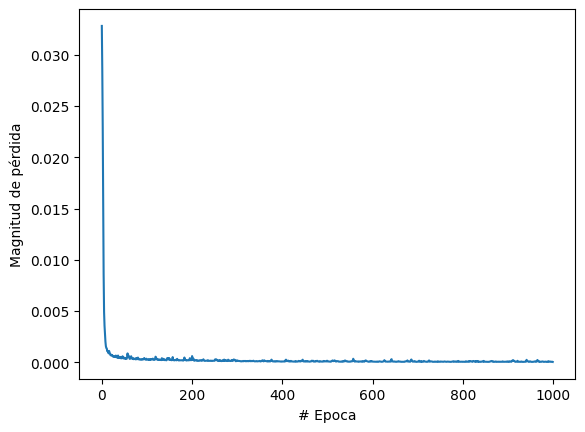

In [78]:
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"]);

In [80]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 2.1276595070958138%


In [81]:
# Nuevo intento, incrementamos las epochs y medimos el tiempo
import time

# Guardar el tiempo de inicio
inicio = time.time()

historial = model.fit(X_train, y_train, epochs=10000, batch_size=10, verbose=1)

# Guardar el tiempo de finalización
fin = time.time()

# Calcular la diferencia de tiempo
tiempo_transcurrido = fin - inicio

print("El código tomó {} segundos en completarse.".format(tiempo_transcurrido))

Se han truncado las últimas 5000 líneas del flujo de salida.
19/19 [==============================] - 0s 1ms/step - loss: 6.2648e-06 - accuracy: 0.0054
Epoch 7502/10000
19/19 [==============================] - 0s 2ms/step - loss: 4.5089e-06 - accuracy: 0.0054
Epoch 7503/10000
19/19 [==============================] - 0s 2ms/step - loss: 3.7373e-06 - accuracy: 0.0054
Epoch 7504/10000
19/19 [==============================] - 0s 2ms/step - loss: 3.7980e-06 - accuracy: 0.0054
Epoch 7505/10000
19/19 [==============================] - 0s 2ms/step - loss: 3.9927e-06 - accuracy: 0.0054
Epoch 7506/10000
19/19 [==============================] - 0s 2ms/step - loss: 7.6715e-06 - accuracy: 0.0054
Epoch 7507/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.0979e-05 - accuracy: 0.0054
Epoch 7508/10000
19/19 [==============================] - 0s 2ms/step - loss: 5.0763e-06 - accuracy: 0.0054
Epoch 7509/10000
19/19 [==============================] - 0s 3ms/step - loss: 4.8884e-06 - a

In [82]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}%')

Accuracy: 2.1276595070958138%


## RFE

In [86]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, Y)
selected_columns = X.columns[rfe.support_]

print("Columnas seleccionadas por RFE:")
print(selected_columns)

Columnas seleccionadas por RFE:
Index(['PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10',
       'PEOE_VSA11', 'EState_VSA1', 'EState_VSA8', 'EState_VSA9',
       'EState_VSA11'],
      dtype='object')


In [97]:
# Datos que se usarán:

X = df[['PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10','PEOE_VSA11', 'EState_VSA1', 'EState_VSA8', 'EState_VSA9','EState_VSA11']]

In [98]:
X

,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,PEOE_VSA10,PEOE_VSA11,EState_VSA1,EState_VSA8,EState_VSA9,EState_VSA11
0,0.138286,0.632521,0.557900,0.354050,0.259420,0.029462,0.575568,0.335287,0.631169,0.0
1,0.138286,0.632521,0.688576,0.354050,0.224333,0.029462,0.621496,0.335287,0.676933,0.0
2,0.138286,0.694199,0.582268,0.354050,0.241876,0.029462,0.591511,0.335287,0.654051,0.0
3,0.000000,0.056347,0.319521,0.295827,0.156279,0.073171,0.363998,0.443991,0.340771,0.0
4,0.424302,0.338082,0.424899,0.416091,0.000000,0.087902,0.476687,0.226243,0.560270,0.0
...,...,...,...,...,...,...,...,...,...,...
227,0.138286,0.632521,0.622871,0.354050,0.224333,0.044193,0.605553,0.335287,0.654051,0.0
228,0.138595,0.228013,0.271572,0.647675,0.363527,0.292038,0.510792,0.332224,0.438067,0.0
229,0.138595,0.228013,0.271572,0.774073,0.363527,0.292038,0.527881,0.328146,0.460785,0.0
230,0.138595,0.228013,0.271572,0.647675,0.363527,0.292038,0.510792,0.388233,0.415349,0.0


In [95]:
Y = df['MolLogP']

In [96]:
Y

0      0.526752
1      0.557698
2      0.542279
3      0.291406
4      0.674189
         ...   
227    0.537318
228    0.605670
229    0.623715
230    0.605670
231    0.605670
Name: MolLogP, Length: 232, dtype: float64

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=182)

In [100]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [101]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss = 'mean_squared_error',
              metrics = 'accuracy')

In [105]:
# Nuevo intento, incrementamos las epochs y medimos el tiempo
import time

# Guardar el tiempo de inicio
inicio = time.time()

historial = model.fit(X_train, y_train, epochs=10000, batch_size=10, verbose=1)

# Guardar el tiempo de finalización
fin = time.time()

# Calcular la diferencia de tiempo
tiempo_transcurrido = fin - inicio

print("El código tomó {} segundos en completarse.".format(tiempo_transcurrido))

Se han truncado las últimas 5000 líneas del flujo de salida.
19/19 [==============================] - 0s 2ms/step - loss: 1.7557e-04 - accuracy: 0.0054
Epoch 7502/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.7017e-04 - accuracy: 0.0054
Epoch 7503/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.6230e-04 - accuracy: 0.0054
Epoch 7504/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.4622e-04 - accuracy: 0.0054
Epoch 7505/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.3498e-04 - accuracy: 0.0054
Epoch 7506/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.7582e-04 - accuracy: 0.0054
Epoch 7507/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.5908e-04 - accuracy: 0.0054
Epoch 7508/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.7498e-04 - accuracy: 0.0054
Epoch 7509/10000
19/19 [==============================] - 0s 2ms/step - loss: 1.7345e-04 - a